In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

In [46]:
data = pd.read_excel('BHL_kmeans.xlsx', sheet_name='Data_by_sub')
data.head()

,Site ID,Site No.,Sample date,Time stamp,Sample type,Flow (cms),DRP (mg P/L),TP (mg P/L),TSS (mg/L),VSS (mg/L),Ammonia (mg/L),Nitrate (mg/L),TN (mg/L)
0,Sub11,11,2016-03-31,42460,Base,0.025511,0.001,0.293,18.666667,14.000000,0.022,35.3001,34.2560
1,Sub11,11,2016-04-14,42474,Base,0.041794,0.013,0.040,2.000000,3.333333,0.002,31.7656,31.7656
2,Sub11,11,2016-04-28,42488,Base,0.078278,0.001,0.129,39.333333,31.333333,0.002,30.5188,30.3610
3,Sub11,11,2016-05-17,42507,Base,0.064980,0.001,0.177,63.333333,37.333333,0.002,22.9285,23.2680
4,Sub11,11,2016-05-17,42507,Base,0.064980,0.001,0.177,63.333333,37.333333,0.002,22.9285,23.2680


In [47]:
X = data[['Time stamp', 'Nitrate (mg/L)']]
X.head()

,Time stamp,Nitrate (mg/L)
0,42460,35.3001
1,42474,31.7656
2,42488,30.5188
3,42507,22.9285
4,42507,22.9285


In [81]:
y_true = data['Site No.']
y_true = y_true.to_numpy()
print(type(y_true))

<class 'numpy.ndarray'>


In [48]:
X = X.to_numpy()
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(156, 2)


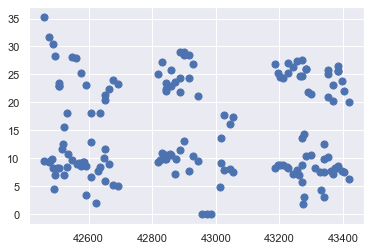

In [49]:
plt.scatter(X[:, 0], X[:, 1], s=50)

In [73]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [74]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 0 0 0 0 0
 0 0 0 0 0 0 0 3 3 3 3 3 3 3 1 1 4 4 4 4 5 5 5 5 2 0 0 0 0 3 3 3 3 3 3 1 1
 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 0 0 0 0 0
 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 4 4 4 4 4 4 4 5 5 5 5 5 2 0 0
 0 0 0 3 3 3 3 3]


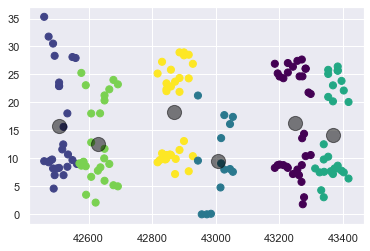

In [78]:
# plots the simulated dataset, colored by its cluster number
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

rseed =  0


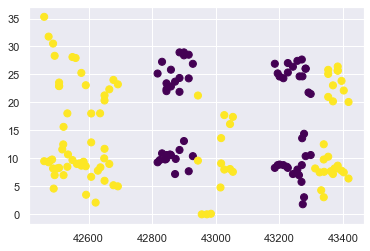

accuracy for fig above =  0.5512820512820513
rseed =  1


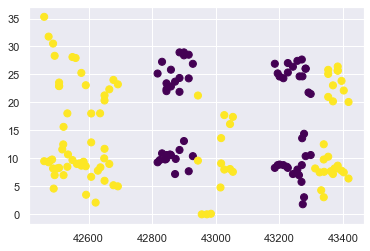

accuracy for fig above =  0.5512820512820513
rseed =  2


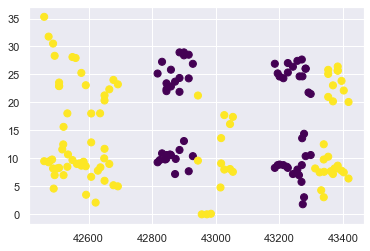

accuracy for fig above =  0.5512820512820513
rseed =  3


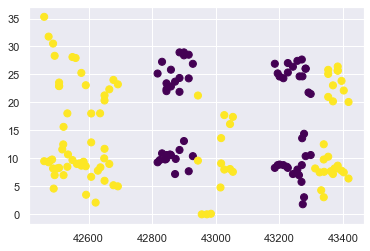

accuracy for fig above =  0.5512820512820513
rseed =  4


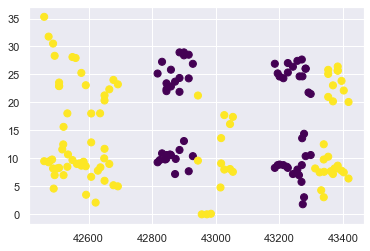

accuracy for fig above =  0.5512820512820513
rseed =  5


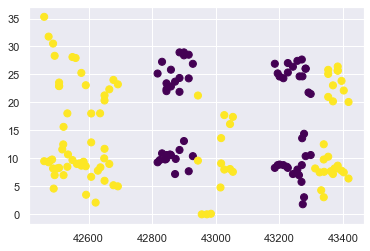

accuracy for fig above =  0.5512820512820513
rseed =  6


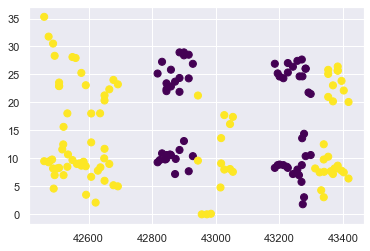

accuracy for fig above =  0.5512820512820513


In [131]:
from sklearn.metrics import pairwise_distances_argmin
from scipy.stats import mode

for a in range(0,7):
    print('rseed = ', a)
    def find_clusters(X, n_clusters, rseed=a):
        # 1. Randomly choose clusters
        rng = np.random.RandomState(rseed)
        i = rng.permutation(X.shape[0])[:n_clusters]
        centers = X[i]

        while True:
            # 2a. Assign labels based on closest center
            labels = pairwise_distances_argmin(X, centers)

            # 2b. Find new centers from means of points
            new_centers = np.array([X[labels == i].mean(0)
                                    for i in range(n_clusters)])

            # 2c. Check for convergence
            if np.all(centers == new_centers):
                break
            centers = new_centers

        return centers, labels

    centers, labels = find_clusters(X, 6)
    labels = np.zeros_like(clusters)
    for i in range(10):
        mask = (clusters == i)
        labels[mask] = mode(y_true[mask])[0] #Takes the mode of the true label
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
    plt.show()
    print('accuracy for fig above = ', accuracy_score(y_true, labels)) 

## Does not cluster properly; Try SpectralClustering approach

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


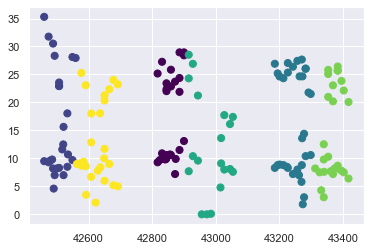

In [83]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=6, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## Spectral clustering did not seem to perform any better 
### The original kmeans were only able to achieve 55.1% accuracy
